In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 1. `load_breast_cancer()` 데이터를 불러와 데이터와 타겟을 변수에 저장합니다.
data = load_breast_cancer()
X, y = data.data, data.target

# 2. 로드된 데이터와 타겟을 `train_test_split` 함수를 사용하여 학습 세트(80%)와 테스트 세트(20%)로 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"학습 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")

학습 데이터 크기: (455, 30)
테스트 데이터 크기: (114, 30)


In [9]:
from sklearn.ensemble import RandomForestClassifier

# 2. `RandomForestClassifier`의 기본 인스턴스를 `random_state`를 42로 설정하여 생성하고, `default_model`이라는 변수에 할당합니다.
default_model = RandomForestClassifier(random_state=42)

# 3. `X_train`과 `y_train` 데이터를 사용하여 `default_model`을 학습시킵니다.
default_model.fit(X_train, y_train)

# 4. 학습된 `default_model`을 사용하여 `X_test` 데이터에 대한 예측을 수행하고, 결과를 `y_pred_default` 변수에 저장합니다.
y_pred_default = default_model.predict(X_test)

print("Default RandomForestClassifier trained and predictions made.")

Default RandomForestClassifier trained and predictions made.


In [10]:
import numpy as np

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

print("Hyperparameter grid for RandomForestClassifier defined.")

Hyperparameter grid for RandomForestClassifier defined.


In [11]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("GridSearchCV completed. Best parameters and score can now be accessed.")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
GridSearchCV completed. Best parameters and score can now be accessed.


In [12]:
import pandas as pd

best_model = grid_search.best_estimator_

y_pred_optimized = best_model.predict(X_test)

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

accuracy_default, precision_default, recall_default, f1_default = evaluate_model(y_test, y_pred_default)
accuracy_optimized, precision_optimized, recall_optimized, f1_optimized = evaluate_model(y_test, y_pred_optimized)

performance_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Default Model': [accuracy_default, precision_default, recall_default, f1_default],
    'Optimized Model': [accuracy_optimized, precision_optimized, recall_optimized, f1_optimized]
}
performance_df = pd.DataFrame(performance_data)

print("모델 성능 평가 결과:")
print(performance_df)

모델 성능 평가 결과:
      Metric  Default Model  Optimized Model
0   Accuracy       0.964912         0.964912
1  Precision       0.958904         0.958904
2     Recall       0.985915         0.985915
3   F1-Score       0.972222         0.972222


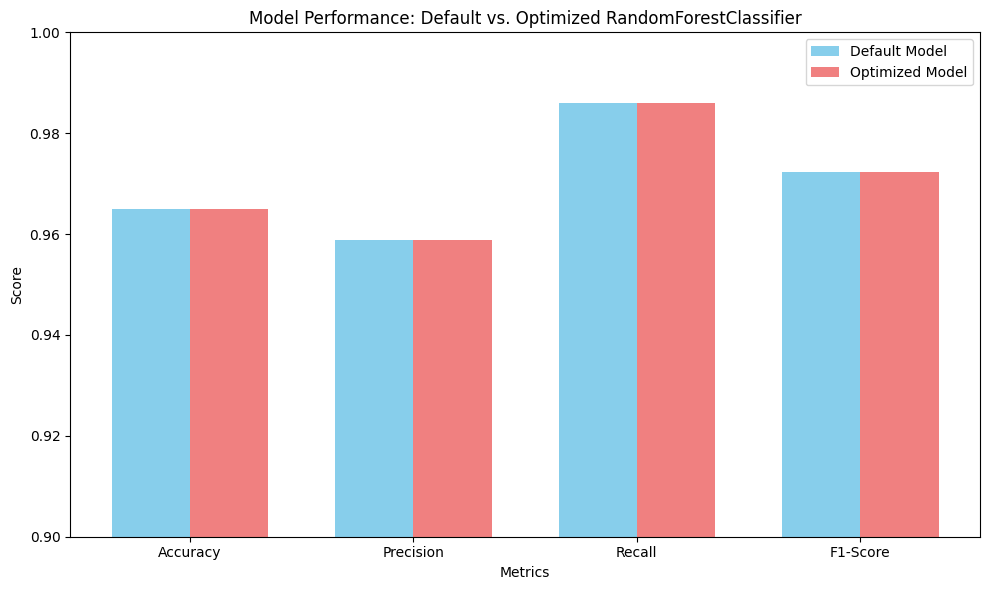

Grouped bar chart showing model performance comparison displayed.


In [13]:
metrics = performance_df['Metric']
default_scores = performance_df['Default Model']
optimized_scores = performance_df['Optimized Model']

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, default_scores, width, label='Default Model', color='skyblue')
rects2 = ax.bar(x + width/2, optimized_scores, width, label='Optimized Model', color='lightcoral')


ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance: Default vs. Optimized RandomForestClassifier')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0.9, 1.0)
plt.tight_layout()
plt.show()

print("Grouped bar chart showing model performance comparison displayed.")

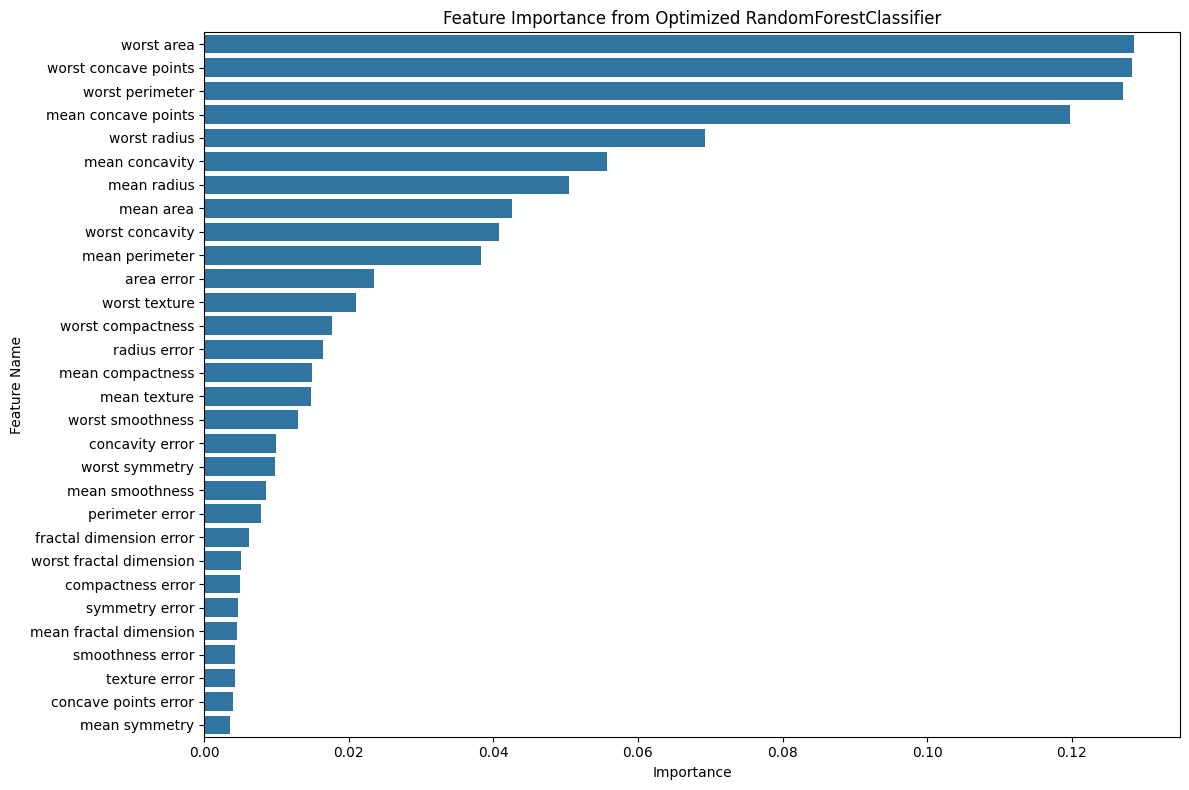

Feature importance bar chart displayed.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


feature_importances = best_model.feature_importances_


features_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': feature_importances
})


features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance from Optimized RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

print("Feature importance bar chart displayed.")